In [1]:
import numpy as np
import _pickle as cPickle
import matplotlib.pyplot as plt
from astropy.io import ascii
import matplotlib as mpl

In [2]:
def median_interval(data, alpha=0.32):
    """
    Median including Bayesian credible interval.

    Parameters
    ----------
    data  : posterior samples
    alpha : 1 - confidence interval

    Returns
    -------
    [med,[lo, hi]] : median, lower, and upper percentiles
    
    """
    q = [100*alpha/2., 50, 100*(1-alpha/2.)]
    lo,med,hi = np.percentile(data,q)
    
    return [med,[lo,hi]]

In [3]:
def returnPDF(rich,x0,y0,gal_ext_pix,gal_ell,gal_pa):
    
    costh = np.cos(-1 * np.deg2rad(gal_pa))
    sinth = np.sin(-1 * np.deg2rad(gal_pa))

    dx = xbin - x0
    dy = ybin - y0

    r1 = (dx * costh - dy * sinth) / (1 - gal_ell)
    r2 = (dx * sinth + dy * costh)

    radius = np.sqrt(r1**2 + r2**2)
    
    r_h = gal_ext_pix
    norm = r_h**2 / (np.pi * (1-gal_ell))
    # half light radius squared / (pi * 1-ell)
    pdf = norm/((radius**2 + r_h**2)**2)
    
    arr = np.array([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
    r_annuli = (arr + 0.05) * r_h

    # .05r_h, .15r_h
    area_annuli = np.pi * ( (r_annuli + (0.05*r_h))**2 - (r_annuli - (0.05*r_h))**2) * (1-gal_ell)
    
    pix_per_arcsec=20
    area_arcmin = area_annuli/(pix_per_arcsec*60)**2
    
    aa = area_arcmin

    return pdf, radius, aa


In [4]:
xbin0 = np.ones((267,1))  # (fltarr(267)+1)
xbin1 = np.ones((1,267))  
xbin1[0] = np.arange(0,267,1)
xbin2 = xbin1 * 30 + 15  # (findgen(267)*30. + 15)
xbin = np.matmul(xbin0,xbin2)
ybin = xbin.T

# creating x and y arrays to represent the bins across the image

In [5]:
xdel = 30.
ydel = 30.
pixarea = xdel*ydel  # pixel area in each bin

In [6]:
samples_mask = cPickle.load( open( "eri2mcmcFullMask2002-2.p", "rb" ) )
#MEDIAN VALUES AND +/-1 SIGMA FOR EACH FIT PARAMETER
rich_m,[rich_min,rich_max] = median_interval(samples_mask[:,0])
x_m,[xmin,xmax] = median_interval(samples_mask[:,1])
y_m,[ymin,ymax] = median_interval(samples_mask[:,2])
eri2_ext_fit_m,[eri2_ext_min,eri2_ext_max] = median_interval(samples_mask[:,3])
eri2_ell_fit_m,[eri2_ell_min,eri2_ell_max] = median_interval(samples_mask[:,4])
eri2_pa_fit_m,[eri2_pa_min,eri2_pa_max] = median_interval(samples_mask[:,5])

res = [rich_m,rich_max-rich_m,rich_m-rich_min,x_m,xmax-x_m,x_m-xmin,y_m,ymax-y_m,y_m-ymin,
           eri2_ext_fit_m,eri2_ext_max-eri2_ext_fit_m,eri2_ext_fit_m-eri2_ext_min,
           eri2_ell_fit_m,eri2_ell_max-eri2_ell_fit_m,eri2_ell_fit_m-eri2_ell_min,
           eri2_pa_fit_m,eri2_pa_max-eri2_pa_fit_m,eri2_pa_fit_m-eri2_pa_min]

print(res)

[14794.44339013712, 157.7273085016841, 150.77800740169005, 4008.153035122044, 22.8879428929381, 21.51425092634736, 3691.637282342737, 15.344826752084373, 15.053022206633159, 2548.6645355921128, 37.65204413508445, 33.67722868613919, 0.22735713130840676, 0.013626216072110203, 0.012223969679549446, 78.79415114112807, 1.6031123739009416, 1.5238732338333847]


In [7]:
pdf_mask, rad_mask, aa_mask = returnPDF(rich_m,x_m,y_m,eri2_ext_fit_m,
                                        eri2_ell_fit_m,eri2_pa_fit_m)

In [8]:
samples_noMask = cPickle.load( open( "eri2mcmcnoMask2002.p", "rb" ) )
#MEDIAN VALUES AND +/-1 SIGMA FOR EACH FIT PARAMETER
rich_nm,[rich_min,richa_noMx] = median_interval(samples_noMask[:,0])
x_nm,[xmin,xmax] = median_interval(samples_noMask[:,1])
y_nm,[ymin,ymax] = median_interval(samples_noMask[:,2])
eri2_ext_fit_nm,[eri2_ext_min,eri2_ext_max] = median_interval(samples_noMask[:,3])
eri2_ell_fit_nm,[eri2_ell_min,eri2_ell_max] = median_interval(samples_noMask[:,4])
eri2_pa_fit_nm,[eri2_pa_min,eri2_pa_max] = median_interval(samples_noMask[:,5])

res_noMask = [rich_nm,rich_max-rich_nm,rich_nm-rich_min,x_nm,xmax-x_nm,x_nm-xmin,y_nm,ymax-y_nm,y_nm-ymin,
           eri2_ext_fit_nm,eri2_ext_max-eri2_ext_fit_nm,eri2_ext_fit_nm-eri2_ext_min,
           eri2_ell_fit_nm,eri2_ell_max-eri2_ell_fit_nm,eri2_ell_fit_nm-eri2_ell_min,
           eri2_pa_fit_nm,eri2_pa_max-eri2_pa_fit_nm,eri2_pa_fit_nm-eri2_pa_min]
print(res_noMask)

[14780.062447307018, 172.10825133178514, 142.46725794966915, 4006.2482789745254, 20.009706682636534, 18.455461136553822, 3693.452587488708, 14.812848466800915, 14.998999129837557, 2546.6875100662646, 32.65788844119743, 32.390933245908855, 0.22627813525163698, 0.010686862900533778, 0.011092779458008378, 78.645179721305, 1.5560801822001764, 1.5573098051294494]


In [9]:
pdf_noMask, rad_noMask, aa_noMask = returnPDF(rich_nm,x_nm,y_nm,eri2_ext_fit_nm,
                                        eri2_ell_fit_nm,eri2_pa_fit_nm)

In [10]:
model_counts_eri2_mask = rich_m*pdf_mask*pixarea  # a 267x267 array

In [11]:
model_counts_eri2_noMask = rich_nm*pdf_noMask*pixarea  # a 267x267 array

In [12]:
cat = ascii.read("eri2cut.cat")  

xgood=cat[cat.colnames[0]]
ygood=cat[cat.colnames[1]]
m606=cat[cat.colnames[2]]
dm606=cat[cat.colnames[3]]
m814=cat[cat.colnames[4]]
dm814=cat[cat.colnames[5]]
flag=cat[cat.colnames[6]]

In [13]:
# Observed surface density map
binned_surface_density_30 = np.zeros((267,267))
for ii in range(267):
    for jj in range(267):
        idx = np.logical_and(np.logical_and(xgood >= (30 * ii),xgood <= (30 * (ii + 1))),
                     np.logical_and(ygood >= (30 * jj),ygood <= (30 * (jj + 1))))

        tmp = np.where(idx)[0]
#         # flipping ii and jj because in IDL, it's col, row.
        binned_surface_density_30[jj,ii] = len(tmp)

In [14]:
# Define annuli
radius1=rad_noMask.flatten()
r_h = eri2_ext_fit_nm
r1 = np.where(radius1 < (0.1 * r_h))[0]
r2 = np.where((radius1 < (0.2 * r_h)) & (radius1 >= (0.1 * r_h)))[0]
r3 = np.where((radius1 < (0.3 * r_h)) & (radius1 >= (0.2 * r_h)))[0]
r4 = np.where((radius1 < (0.4 * r_h)) & (radius1 >= (0.3 * r_h)))[0]
r5 = np.where((radius1 < (0.5 * r_h)) & (radius1 >= (0.4 * r_h)))[0]
r6 = np.where((radius1 < (0.6 * r_h)) & (radius1 >= (0.5 * r_h)))[0]
r7 = np.where((radius1 < (0.7 * r_h)) & (radius1 >= (0.6 * r_h)))[0]
r8 = np.where((radius1 < (0.8 * r_h)) & (radius1 >= (0.7 * r_h)))[0]
r9 = np.where((radius1 < (0.9 * r_h)) & (radius1 >= (0.8 * r_h)))[0]
r10 = np.where((radius1 < r_h) & (radius1 >= (0.9 * r_h)))[0]

In [15]:
# Define annuli
radius1_m=rad_mask.flatten()
r_h_m = eri2_ext_fit_m
r1_m = np.where(radius1_m< (0.1 * r_h_m))[0]
r2_m = np.where((radius1_m< (0.2 * r_h_m)) & (radius1_m>= (0.1 * r_h_m)))[0]
r3_m = np.where((radius1_m< (0.3 * r_h_m)) & (radius1_m>= (0.2 * r_h_m)))[0]
r4_m = np.where((radius1_m< (0.4 * r_h_m)) & (radius1_m>= (0.3 * r_h_m)))[0]
r5_m = np.where((radius1_m< (0.5 * r_h_m)) & (radius1_m>= (0.4 * r_h_m)))[0]
r6_m = np.where((radius1_m< (0.6 * r_h_m)) & (radius1_m>= (0.5 * r_h_m)))[0]
r7_m = np.where((radius1_m< (0.7 * r_h_m)) & (radius1_m>= (0.6 * r_h_m)))[0]
r8_m = np.where((radius1_m< (0.8 * r_h_m)) & (radius1_m>= (0.7 * r_h_m)))[0]
r9_m = np.where((radius1_m< (0.9 * r_h_m)) & (radius1_m>= (0.8 * r_h_m)))[0]
r10_m = np.where((radius1_m< r_h_m) & (radius1_m>= (0.9 * r_h_m)))[0]

In [16]:
binned_surface_density_30f = binned_surface_density_30.flatten()
model_counts_eri2_mask_f = model_counts_eri2_mask.flatten()
model_counts_eri2_noMask_f = model_counts_eri2_noMask.flatten()

data_1d_m = [binned_surface_density_30f[r1_m].sum()/aa_mask[0],
           binned_surface_density_30f[r2_m].sum()/aa_mask[1],
           binned_surface_density_30f[r3_m].sum()/aa_mask[2],
           binned_surface_density_30f[r4_m].sum()/aa_mask[3],
           binned_surface_density_30f[r5_m].sum()/aa_mask[4],
           binned_surface_density_30f[r6_m].sum()/aa_mask[5],
           binned_surface_density_30f[r7_m].sum()/aa_mask[6],
           binned_surface_density_30f[r8_m].sum()/aa_mask[7],
           binned_surface_density_30f[r9_m].sum()/aa_mask[8],
           binned_surface_density_30f[r10_m].sum()/aa_mask[9]]

data_1d_nm = [binned_surface_density_30f[r1].sum()/aa_noMask[0],
           binned_surface_density_30f[r2].sum()/aa_noMask[1],
           binned_surface_density_30f[r3].sum()/aa_noMask[2],
           binned_surface_density_30f[r4].sum()/aa_noMask[3],
           binned_surface_density_30f[r5].sum()/aa_noMask[4],
           binned_surface_density_30f[r6].sum()/aa_noMask[5],
           binned_surface_density_30f[r7].sum()/aa_noMask[6],
           binned_surface_density_30f[r8].sum()/aa_noMask[7],
           binned_surface_density_30f[r9].sum()/aa_noMask[8],
           binned_surface_density_30f[r10].sum()/aa_noMask[9]]

model_1d_nm = [model_counts_eri2_noMask_f[r1].sum()/aa_noMask[0],
            model_counts_eri2_noMask_f[r2].sum()/aa_noMask[1],
            model_counts_eri2_noMask_f[r3].sum()/aa_noMask[2],
            model_counts_eri2_noMask_f[r4].sum()/aa_noMask[3],
            model_counts_eri2_noMask_f[r5].sum()/aa_noMask[4],
            model_counts_eri2_noMask_f[r6].sum()/aa_noMask[5],
            model_counts_eri2_noMask_f[r7].sum()/aa_noMask[6],
            model_counts_eri2_noMask_f[r8].sum()/aa_noMask[7],
            model_counts_eri2_noMask_f[r9].sum()/aa_noMask[8],
            model_counts_eri2_noMask_f[r10].sum()/aa_noMask[9]]

model_1d_m = [model_counts_eri2_mask_f[r1_m].sum()/aa_mask[0],
            model_counts_eri2_mask_f[r2_m].sum()/aa_mask[1],
            model_counts_eri2_mask_f[r3_m].sum()/aa_mask[2],
            model_counts_eri2_mask_f[r4_m].sum()/aa_mask[3],
            model_counts_eri2_mask_f[r5_m].sum()/aa_mask[4],
            model_counts_eri2_mask_f[r6_m].sum()/aa_mask[5],
            model_counts_eri2_mask_f[r7_m].sum()/aa_mask[6],
            model_counts_eri2_mask_f[r8_m].sum()/aa_mask[7],
            model_counts_eri2_mask_f[r9_m].sum()/aa_mask[8],
            model_counts_eri2_mask_f[r10_m].sum()/aa_mask[9]]


In [17]:
dist_x = np.array([r_h*0.1,r_h*0.2,r_h*0.3,r_h*0.4,r_h*0.5,r_h*0.6,r_h*0.7,r_h*0.8,r_h*0.9,r_h])/1200

In [18]:
dist_x_m = np.array([r_h_m*0.1,r_h_m*0.2,r_h_m*0.3,r_h_m*0.4,r_h_m*0.5,r_h_m*0.6,r_h_m*0.7,r_h_m*0.8,r_h_m*0.9,r_h_m])/1200

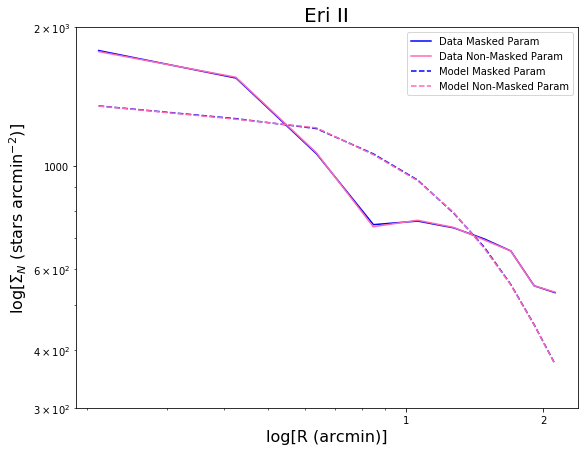

In [19]:
fig, ax = plt.subplots(figsize=(9,7))

ax.plot(dist_x_m,data_1d_m,label='Data Masked Param',color='blue')
ax.plot(dist_x,data_1d_nm,label='Data Non-Masked Param',color='hotpink')

ax.plot(dist_x_m,model_1d_m,label='Model Masked Param',color='blue',linestyle='--')
ax.plot(dist_x,model_1d_nm,label='Model Non-Masked Param',color='hotpink',linestyle='--')


ax.set_xscale('log')
ax.set_yscale('log')

ax.set_ylabel(r'log[$\Sigma_N$ (stars arcmin$^{-2}$)]',fontsize=16)
ax.set_xlabel(r'log[R (arcmin)]',fontsize=16)
ax.set_title('Eri II',fontsize=20)

ax.set_xticks([1, 2])
ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())

ax.set_yticks([1e+2, 1e+3])
ax.get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_ylim(300,2000)

ax.legend()
plt.savefig('figures/eri2_2202masks.png')
plt.show()